In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# **Data Reading**

In [2]:
data = pd.read_csv('D:\Personal Projects\Heart Disease project\Dataset\Raw dataset of heart disease.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Praka\AppData\Local\Temp\ipykernel_17540\3370991439.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Personal Projects\Heart Disease project\Dataset\Raw dataset of heart disease.csv')


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of the peak,colored by flourosopy,thal,target
0,52,Male,typical angina,125,212,False,having ST-T,168,No,1.0,downsloping,2,reversable defect,No
1,53,Male,typical angina,140,203,True,normal,155,Yes,3.1,upsloping,0,reversable defect,No
2,70,Male,typical angina,145,174,False,having ST-T,125,Yes,2.6,upsloping,0,reversable defect,No
3,61,Male,typical angina,148,203,False,having ST-T,161,No,0.0,downsloping,1,reversable defect,No
4,62,Female,typical angina,138,294,True,having ST-T,106,No,1.9,flat,3,fixed defect,No


# **Exploratory Data Analysis**

In [3]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

# **Univariate Analysis For Numerical Columns**

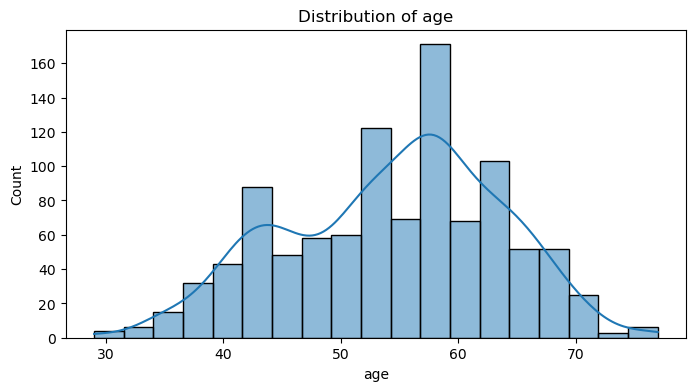

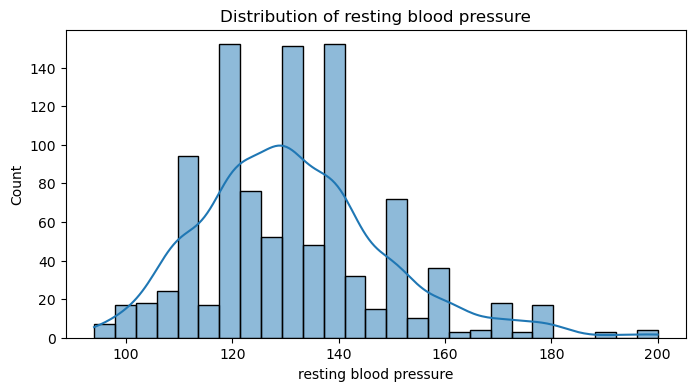

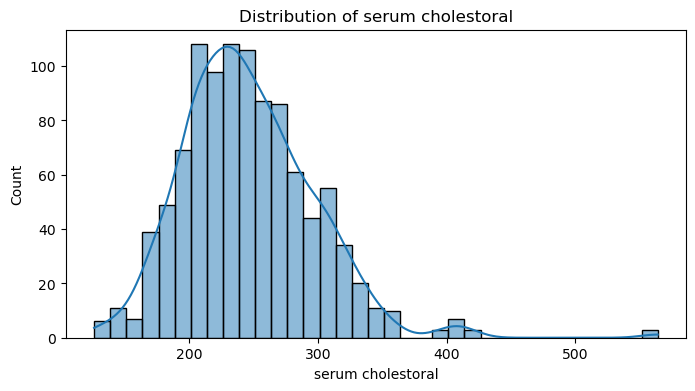

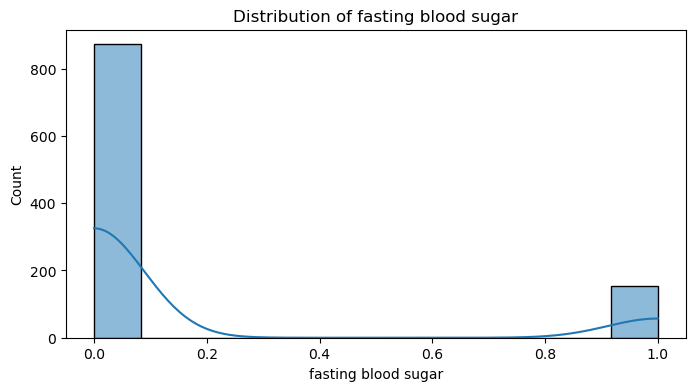

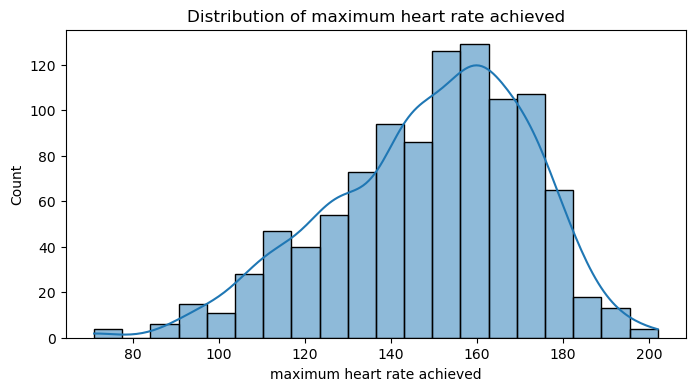

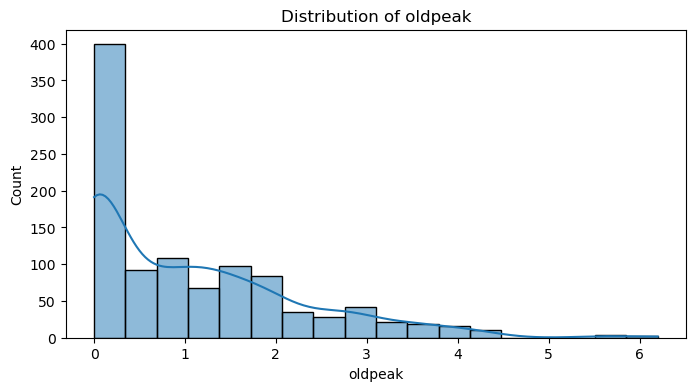

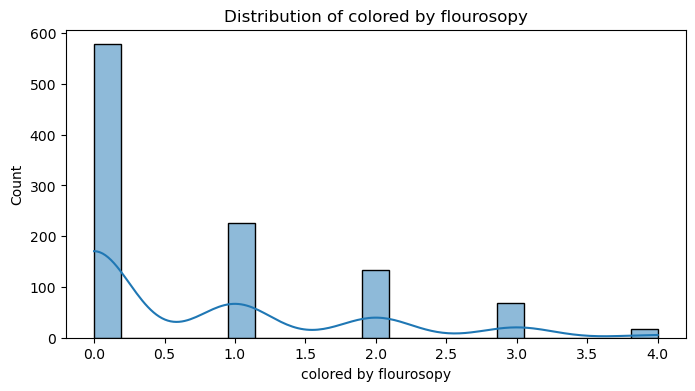

In [4]:
for col in num_cols:
  plt.figure(figsize=(8,4))
  sns.histplot(data[col],kde = True)
  plt.title(f'Distribution of {col}')
  plt.show()

## **Univariate analysis For Numerical Columns Interpretation:**
- **Age:** Follows a normal distribution, with the majority of ages ranging between 40 and 65.
- **Resting Blood Pressure (RBP):** Normally distributed, with most values falling between 120 and 140 mmHg.
- **Cholesterol:** Right-skewed distribution, with the majority of cholesterol levels between 190 and 280 mg/dL.
- **Fasting Blood Sugar (FBS):** Most individuals do not exhibit elevated fasting blood sugar, though a few have significantly high levels.
- **Maximum Heart Rate:** Left-skewed distribution, with the majority of values ranging between 120 and 180 bpm.
- **Oldpeak (ST Depression):** Right-skewed distribution, with most values around 0, while fewer individuals have values between 3 and 4.
- **Fluoroscopy (Colored):** Most individuals have 0 fluoroscopy counts, with fewer having values of 3 or 4.

# **Univariate analysis For categorical Columns**

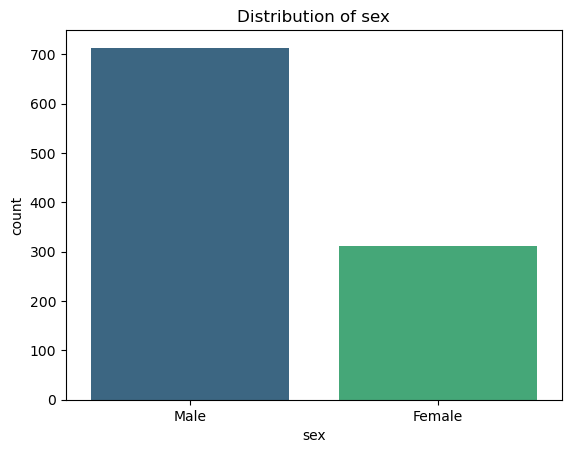

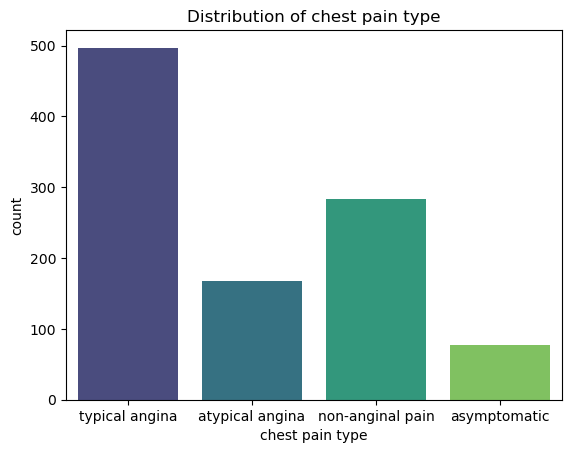

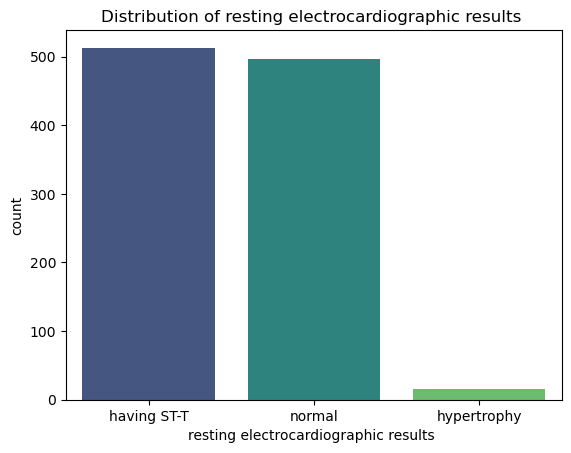

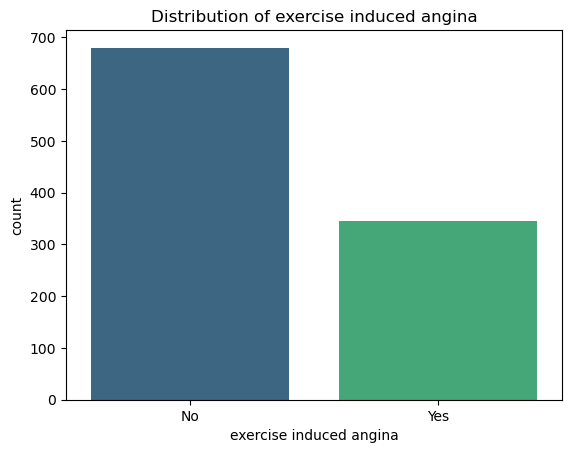

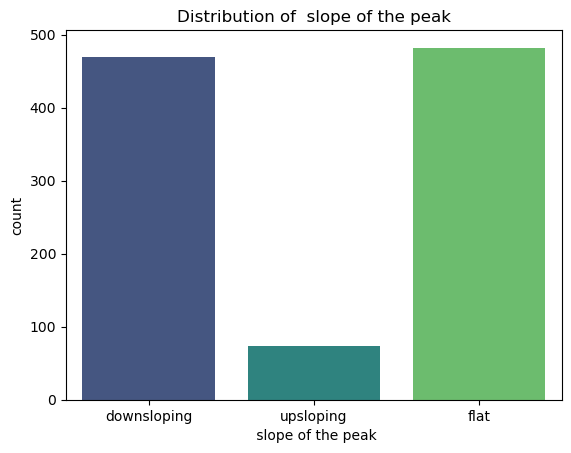

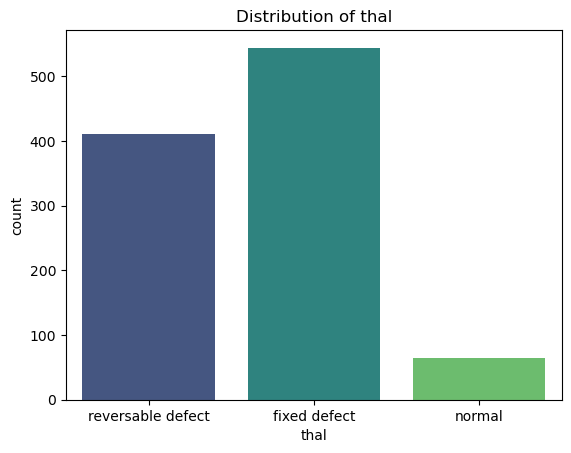

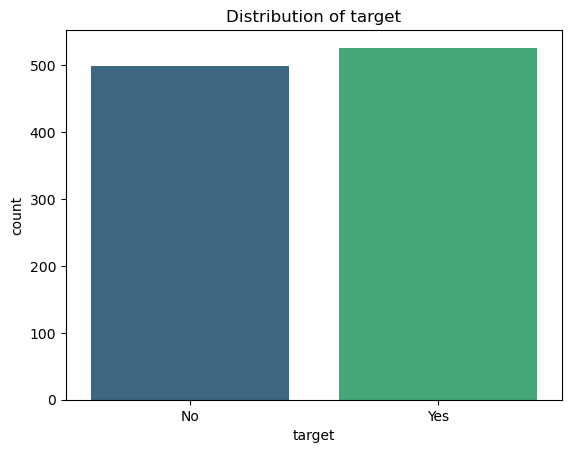

In [5]:
import warnings
warnings.filterwarnings('ignore')
for col in cat_cols:
  sns.countplot(data,x=col,palette='viridis')

  plt.title(f'Distribution of {col}')
  plt.show()

## **Univariate analysis For categorical Columns Interpretation :**
- **Gender:** The dataset shows a higher number of male patients compared to female patients.
- **Chest Pain Types:** Among the four types of chest pain, Typical Angina is the most commonly observed.
- **Resting Electrocardiographic (RECG) Results:** The majority of individuals fall under ST-T wave abnormalities (ST and T), with fewer cases of Left Ventricular Hypertrophy.
-**Exercise-Induced Angina:** Most individuals do not exhibit exercise-induced angina.
- **Slope of the Peak Exercise ST Segment:** Downsloping and flat slopes are more prevalent compared to upsloping.
- **Thalassemia (Thal):** Most patients exhibit a fixed defect pattern.
- **Heart Disease:** A significant proportion of individuals in the dataset are affected by heart disease.

## **Bivariate Analysis**

**Binning the data for Better visualization**

In [6]:
data['age_group'] = pd.cut(data['age'],
                           bins = [0,20,30,40,50,60],
                           labels= ['0-20','20-30','30-40','40-50','50+'])

In [7]:
data['resting blood pressure_group'] = pd.cut(data['resting blood pressure'],
                                              bins = [90,120,160,200],
                                              labels= ['90-120','120-160','160-200'])

In [8]:
data['serum cholestoral_group'] = pd.cut(data['serum cholestoral'],
                                              bins = [100,200,300,500],
                                              labels= ['100-200','200-300','300+'])


In [9]:
data['maximum heart rate achieved_group'] = pd.cut(data['maximum heart rate achieved'],
                                              bins = [60,100,140,220],
                                              labels= ['60-100','100-140','140+'])



In [10]:
data['oldpeak_group'] = pd.cut(data['oldpeak'],
                               bins = [0,1.5,4.2,6.5],
                               labels= ['0-1.5','1.5-4.2','4.2-6.5'])

In [11]:
select_cols = ['age_group', 'chest pain type','exercise induced angina',  ' slope of the peak',
       'colored by flourosopy', 'thal','resting blood pressure_group', 'serum cholestoral_group',
               'maximum heart rate achieved_group', 'oldpeak_group','fasting blood sugar','resting electrocardiographic results ']
target = 'target'

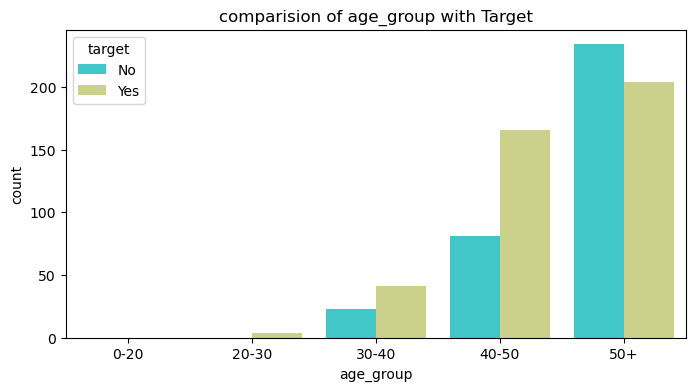

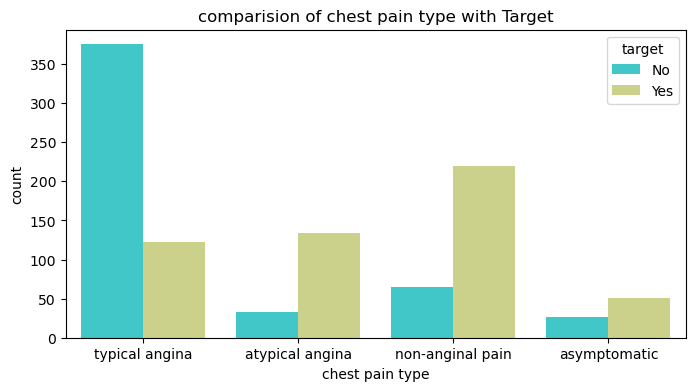

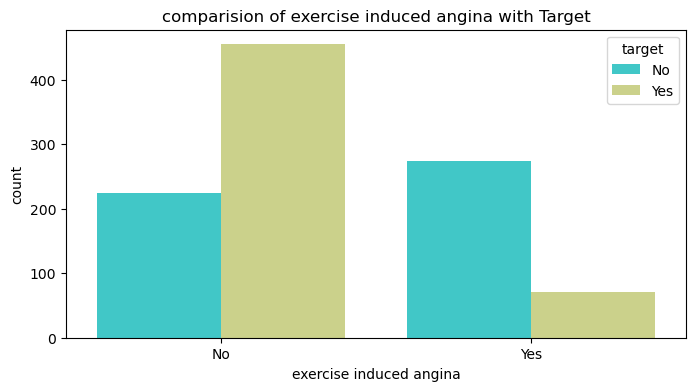

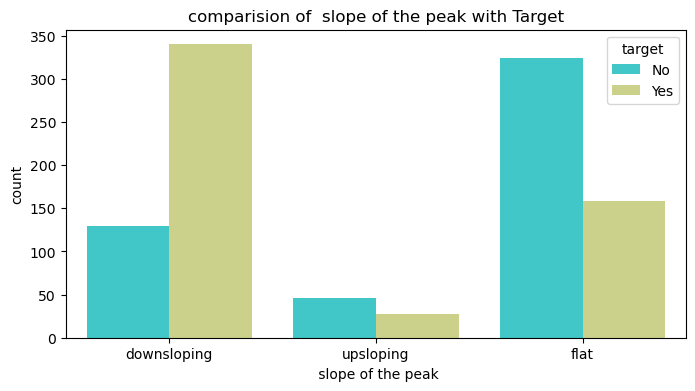

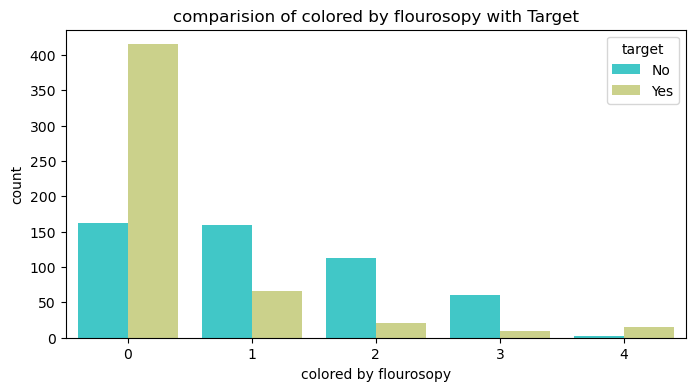

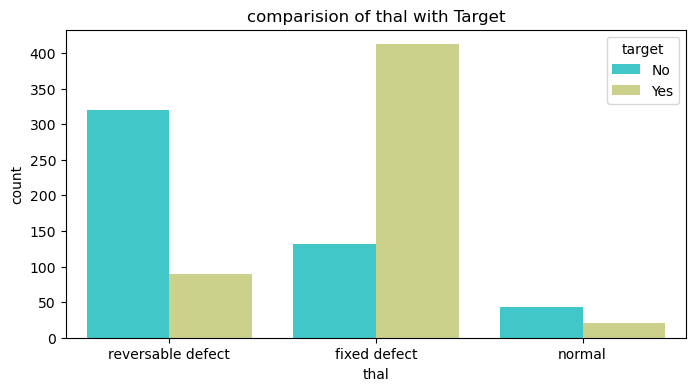

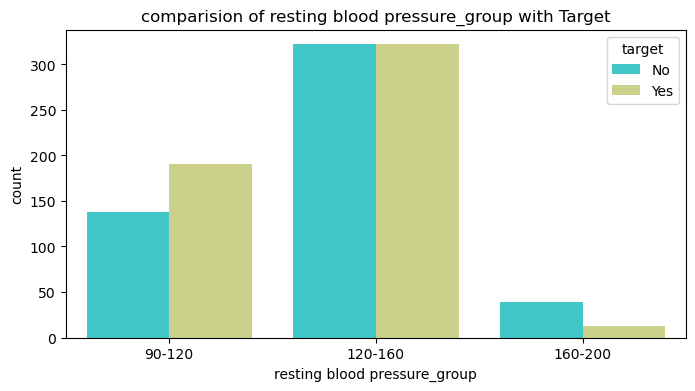

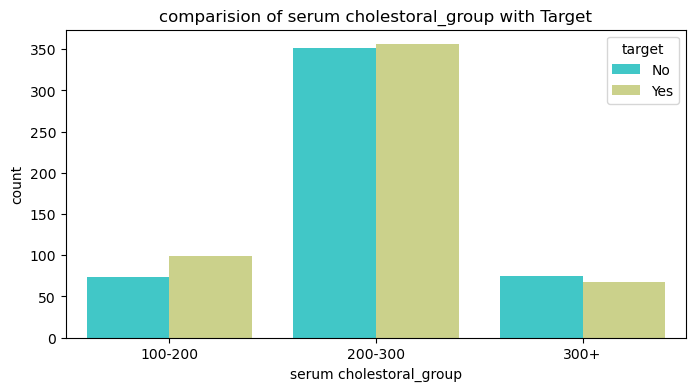

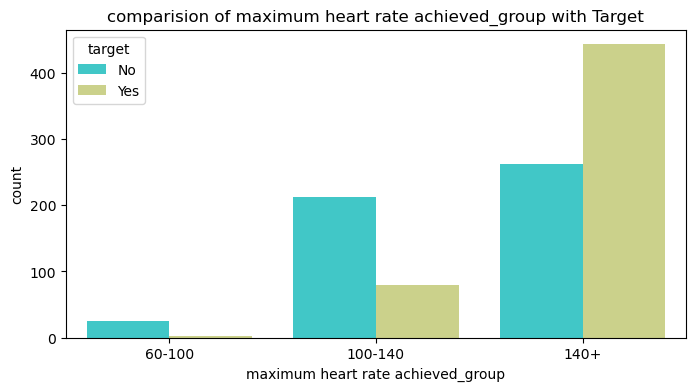

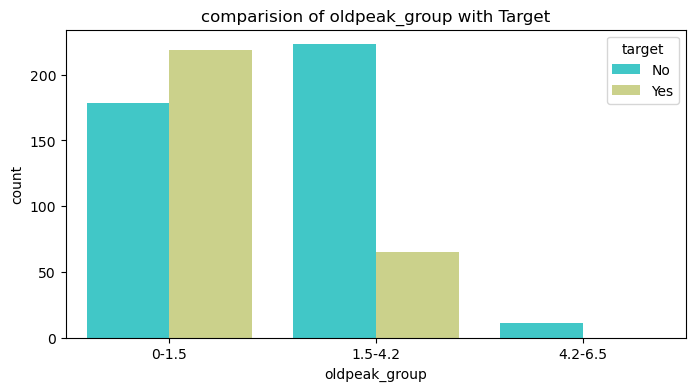

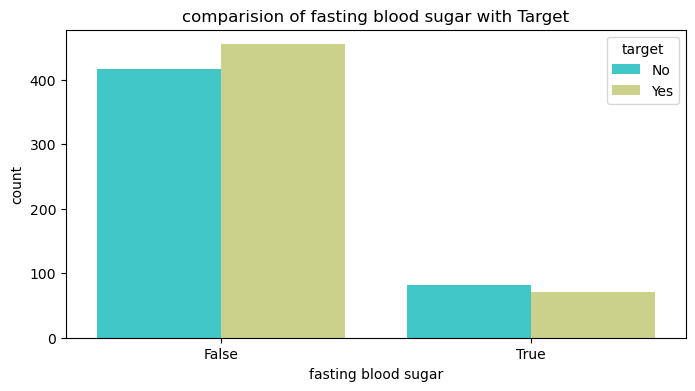

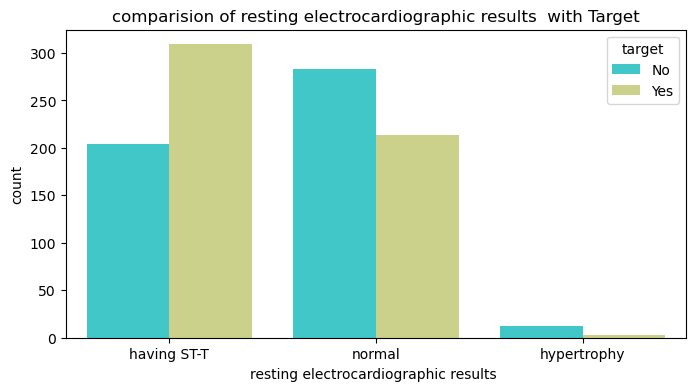

In [12]:
for col in select_cols:
  plt.figure(figsize=(8,4))
  sns.countplot(data,x=col,hue=target,palette='rainbow')
  plt.title(f'comparision of {col} with Target')
  plt.show()

## **Bivariate Analysis Interpretation:**
- **Age Group:** Individuals aged 0–20 are not affected by heart attacks, while most cases occur in individuals aged 50 and above.
- **Chest Pain Type:** Non-anginal chest pain is the most common among heart attack patients.
- **Exercise:** Patients who do not engage in exercise are more likely to experience heart attacks.
- **Slope of Peak Exercise ST Segment:** Patients with a downsloping peak are the most affected by heart attacks.
- **Fluoroscopy:** Patients with a fluoroscopy count of 0 are the most affected by heart attacks.
- **Thalassemia (Thal):** Those with a fixed defect pattern are predominantly affected by heart attacks.
- **Resting Blood Pressure:** Patients with resting blood pressure between 90–120 mmHg are the most affected by heart attacks.
- **Serum Cholesterol:** Cholesterol levels between 100–200 mg/dL are most associated with heart attacks.
- **Maximum Heart Rate:** Heart rates exceeding 140 bpm increase the likelihood of heart attacks.
- **Oldpeak (ST Depression):** Values between 0–1.5 indicate higher chances of heart attacks.
- **Fasting Blood Sugar (FBS):** Patients without elevated fasting blood sugar are more likely to experience heart attacks.
- **Resting ECG (RECG) Results:** ST-T wave abnormalities are strongly associated with heart attacks.

## **Multivariate Analysis**

**Droping Bins For Better visualization**  

In [13]:
data.drop(['age_group',
       'resting blood pressure_group', 'serum cholestoral_group',
       'oldpeak_group','maximum heart rate achieved_group'],axis=1,inplace=True)

In [14]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results ', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak', ' slope of the peak',
       'colored by flourosopy', 'thal', 'target'],
      dtype='object')

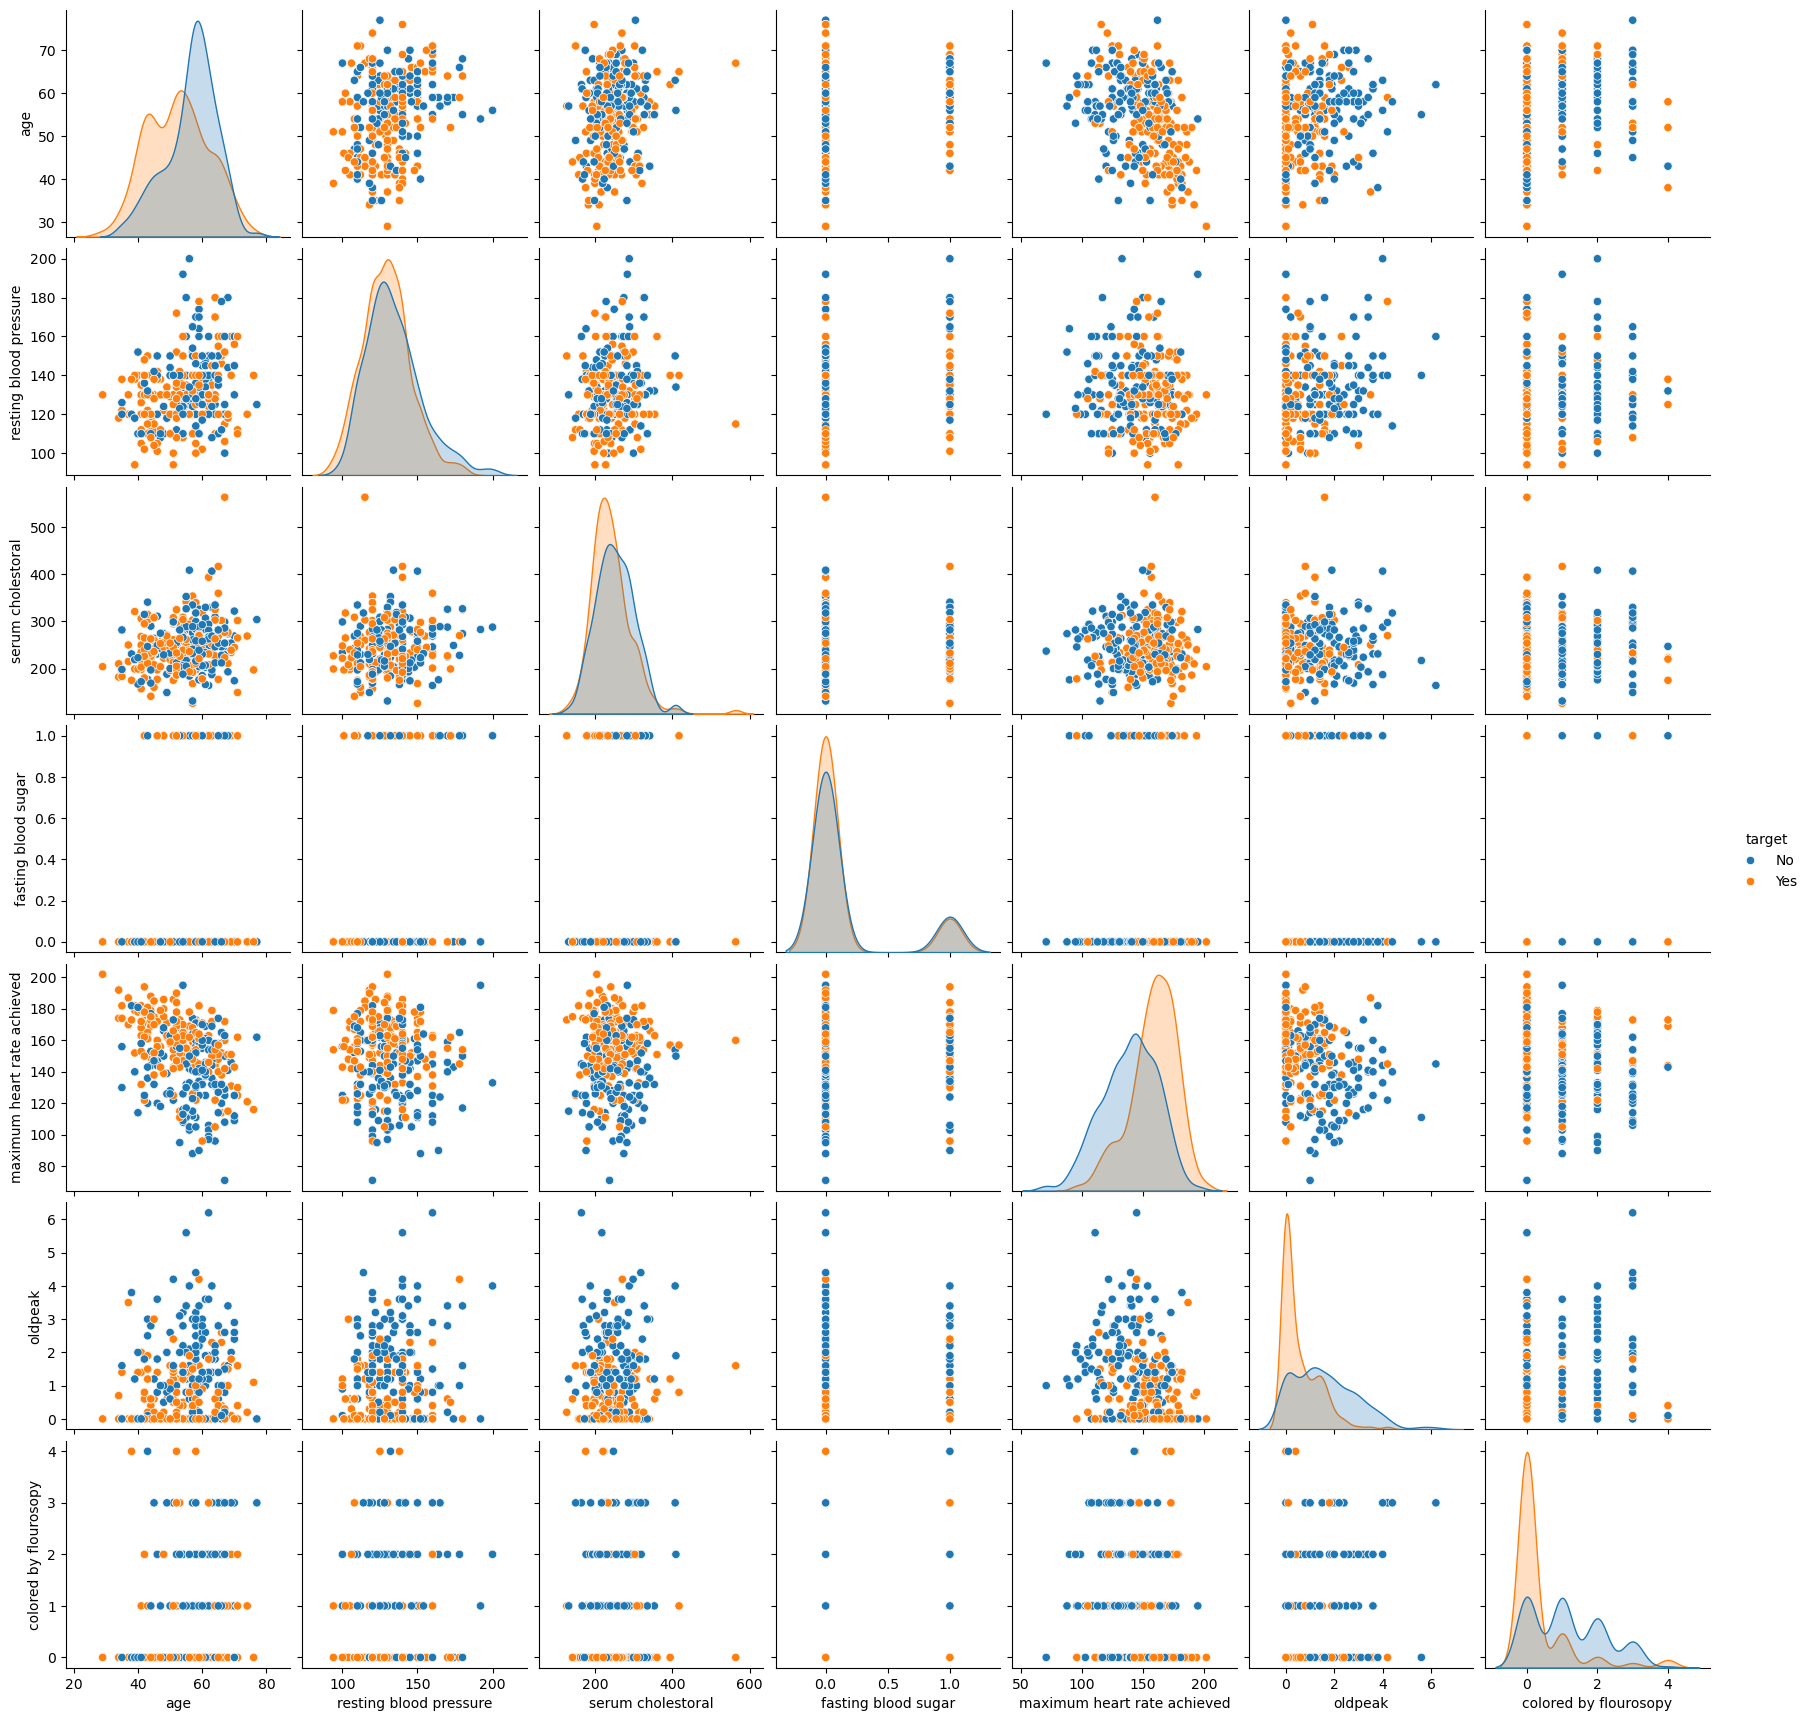

In [15]:
sns.pairplot(data,hue='target')

plt.show()

## **Multivariate Analysis Interpretation:**
- **Age and Cholesterol:** Cholesterol levels tend to increase with age, while maximum heart rate decreases.
- **Heart Rate:** Individuals with heart rates between 50–60 bpm are more likely to experience heart attacks.
- **Blood Pressure:** Resting blood pressure levels between 180–200 mmHg are strongly associated with heart attacks.
- **Age and Blood Pressure:** These variables show a strong positive correlation, whereas age and maximum heart rate are strongly negatively correlated.
- **Serum Cholesterol and Oldpeak:** A strong but directionless correlation exists between these two variables.

## **Data Preprocessing**

In [16]:
data.describe()

,age,resting blood pressure,serum cholestoral,maximum heart rate achieved,oldpeak,colored by flourosopy
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


- There are no outliers in the data
- Max Heart rate is 202 and Min Heart rate is 71
- Max Age is 77 and Min Age is 29

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    1025 non-null   int64  
 1   sex                                    1025 non-null   object 
 2   chest pain type                        1025 non-null   object 
 3   resting blood pressure                 1025 non-null   int64  
 4   serum cholestoral                      1025 non-null   int64  
 5   fasting blood sugar                    1025 non-null   bool   
 6   resting electrocardiographic results   1025 non-null   object 
 7   maximum heart rate achieved            1025 non-null   int64  
 8   exercise induced angina                1025 non-null   object 
 9   oldpeak                                1025 non-null   float64
 10   slope of the peak                     1025 non-null   object 
 11  colo

- There are 7 Missing values in thal column.
- There are 7 object type columns , 6 numerical columns and 1 boolean type columns in the Data

In [18]:
data.isna().sum()

age                                      0
sex                                      0
chest pain type                          0
resting blood pressure                   0
serum cholestoral                        0
fasting blood sugar                      0
resting electrocardiographic results     0
maximum heart rate achieved              0
exercise induced angina                  0
oldpeak                                  0
 slope of the peak                       0
colored by flourosopy                    0
thal                                     7
target                                   0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['thal'] = imputer.fit_transform(data[['thal']]).ravel()

In [20]:
data.isnull().sum()

age                                      0
sex                                      0
chest pain type                          0
resting blood pressure                   0
serum cholestoral                        0
fasting blood sugar                      0
resting electrocardiographic results     0
maximum heart rate achieved              0
exercise induced angina                  0
oldpeak                                  0
 slope of the peak                       0
colored by flourosopy                    0
thal                                     0
target                                   0
dtype: int64

In [21]:
for col in cat_cols:
  print(data[col].value_counts())
  print("===================>")

sex
Male      713
Female    312
Name: count, dtype: int64
===================>
chest pain type
typical angina      497
non-anginal pain    284
atypical angina     167
asymptomatic         77
Name: count, dtype: int64
===================>
resting electrocardiographic results 
having ST-T    513
normal         497
hypertrophy     15
Name: count, dtype: int64
===================>
exercise induced angina
No     680
Yes    345
Name: count, dtype: int64
===================>
 slope of the peak
flat           482
downsloping    469
upsloping       74
Name: count, dtype: int64
===================>
thal
fixed defect         551
reversable defect    410
normal                64
Name: count, dtype: int64
===================>
target
Yes    526
No     499
Name: count, dtype: int64
===================>


In [22]:
## converting Fasting blood sugar from Boolean data type to numerical
data['fasting blood sugar'] = data['fasting blood sugar'].map({False:0,True:1})

**Converting Categorical columns to numerical**

In [23]:
data['sex'] = data['sex'].map({'Male':0,'Female':1})
data['target'] = data['target'].map({'No':0,'Yes':1})
data['exercise induced angina'] = data['exercise induced angina'].map({'No':0,'Yes':1})

In [24]:
x = data.drop('target',axis=1)
y = data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
num_cols = x_train.select_dtypes(exclude='object').columns
cat_cols = x_train.select_dtypes(include='object').columns


In [28]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder())
    ])

preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
])

In [29]:
x_train_new = preprocessor.fit_transform(x_train)
x_test_new = preprocessor.transform(x_test)

# **Model Building**

In [30]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False)
}

params = {'Logistic Regression':{
    'penalty':['l1', 'l2', 'elasticnet'],'C':[0.1,1,10]},
    'K-Nearest Neighbors':{
    'n_neighbors':[3,5,7,9],
    'weights':['uniform', 'distance'],'p':[1,2]},
    'Decision Tree':{
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 10,15,20]},'Random Forest':{
    'n_estimators':[100,200,300],'max_depth':[None,5,10]},
    'AdaBoost':{
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.05,0.1]},
    'Gradient Boosting':{
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1]},
    'Support Vector Machine':{
    'C':[0.1,0.2,0.5],
    'kernel':['linear', 'rbf', 'poly']},
    'XGBoost':{
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1]},
    'CatBoost':{
    'iterations':[100,200,300],
    'learning_rate':[0.01,0.05,0.1]}}


In [31]:
for model_name,model in models.items():
  model = model
  model.fit(x_train_new,y_train)
  predicts = model.predict(x_test_new)
  print(f"{model_name} Accuracy: {accuracy_score(y_test,predicts)}")

Logistic Regression Accuracy: 0.8195121951219512
K-Nearest Neighbors Accuracy: 0.7951219512195122
Decision Tree Accuracy: 0.9853658536585366
Random Forest Accuracy: 0.9853658536585366
AdaBoost Accuracy: 0.8878048780487805
Gradient Boosting Accuracy: 0.9121951219512195
Support Vector Machine Accuracy: 0.8878048780487805
XGBoost Accuracy: 0.9853658536585366
CatBoost Accuracy: 0.9853658536585366


In [ ]:
report = {}
for model_name,model in models.items():
  grid = GridSearchCV(model,param_grid=params[model_name],cv=5)
  grid.fit(x_train_new,y_train)
  report[model_name] = grid.best_score_
  print(f"{model_name} Best Score: {grid.best_score_}")


Logistic Regression Best Score: 0.8682926829268294
K-Nearest Neighbors Best Score: 0.9829268292682926
Decision Tree Best Score: 0.974390243902439
Random Forest Best Score: 0.9829268292682926
AdaBoost Best Score: 0.8890243902439025


In [ ]:
best_score = max(score for _,score in report.items())

best_model = [model for model,score in report.items() if score == best_score]
print(f"Best Model: {best_model[0]} with score {best_score}")

Best Model: XGBoost with score 0.9865853658536585


In [ ]:
grid.best_params_

{'iterations': 200, 'learning_rate': 0.05}

In [ ]:
xgb_model = XGBClassifier(n_estimators=200,learning_rate=0.05)
xgb_model.fit(x_train_new,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'xgb_model', 'preprocessor', and necessary libraries are loaded from the previous code

# Input data
input_data = np.array([[22,1,'typical angina',150,240,0,'having ST-T',250,1,1.5,'downsloping',3,'reversable defect']])

# **Corrected column names to match the preprocessor's expectations**
columns = ['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results ', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak', ' slope of the peak',
       'colored by flourosopy', 'thal']

# Preprocess the input data using the same preprocessor fitted on the training data
input_data_df = pd.DataFrame(input_data, columns=columns)

# **Print input_data_df columns for verification**
print(input_data_df.columns)

input_data_processed = preprocessor.transform(input_data_df)

# Make a prediction using the trained XGBoost model
prediction = xgb_model.predict(input_data_processed)

print(f"Prediction: {prediction[0]}") # Output will be either 0 or 1

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results ', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak', ' slope of the peak',
       'colored by flourosopy', 'thal'],
      dtype='object')
Prediction: 0
